# Julia 
### Exemplary Problem: Numerical solution of logistic differential equation 
$\frac{\partial U(t)}{\partial t} = U(t)(1-U(t))$ 
 
Strategy: 
Transform into discrete sequence and calculate the single steps for sufficient small time steps $\Delta t$.

$U(t+\Delta t) =U(t)+ U(t)(1-U(t))\Delta t $

First step: Install neccesary packages (only for the first time running this notebook)

In [2]:
using Pkg
Pkg.add("BenchmarkTools")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\ank10ki\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\ank10ki\.julia\environments\v1.6\Manifest.toml`
Precompiling project...
  ✓ GLMakie
  1 dependency successfully precompiled in 24 seconds (327 already precompiled)
   Resolving package versions...
  No Changes to `C:\Users\ank10ki\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\ank10ki\.julia\environments\v1.6\Manifest.toml`
Precompiling project...
  ✓ GLMakie
  1 dependency successfully precompiled in 24 seconds (327 already precompiled)


Second step: Define function for discretisation with number of steps N as input argument

In [3]:
function julia_logistic(N)
    # Parameters
    T = 25.0
    u0 = 1e-5
    # Right hand side function
    f(U)= U*(1-U)
    # Discretization
    t = collect(LinRange(0.0,T,N))
    dt = T/N
    # Time stepping
    u = zeros(N)
    u[1] = u0
    for k = 1:(N-1)
        u[k+1] = u[k] + dt*f(u[k])
    end
    return(t,u)
   
end

julia_logistic (generic function with 1 method)

Third step: Visualize the problem, so see if everthing works as planned  

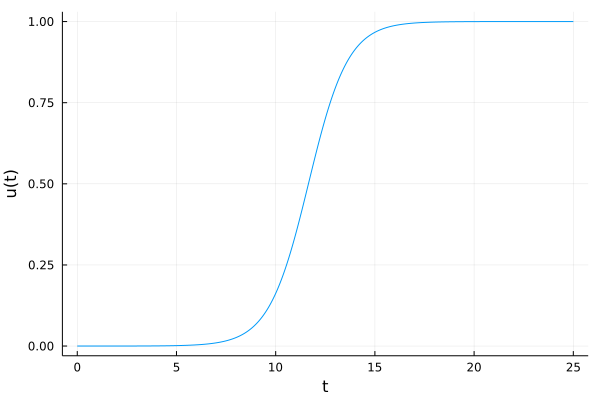

In [4]:
using Plots
T,U = julia_logistic(1000)
plot(
    T,
    U, 
    xlabel = "t",
    ylabel ="u(t)",
    label ="",
    )

Fourth step: Benchmark the function 

In [5]:
using BenchmarkTools

In [7]:
@benchmark julia_logistic(1000)

BenchmarkTools.Trial: 10000 samples with 6 evaluations.
 Range (min … max):  4.933 μs … 827.450 μs  ┊ GC (min … max): 0.00% … 99.19%
 Time  (median):     5.717 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.893 μs ±  16.369 μs  ┊ GC (mean ± σ):  9.75% ±  4.25%

     █▄                                                        
  ▂▃▆██▅▄▄▃▃▅██▅▄▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂ ▃
  4.93 μs         Histogram: frequency by time        12.7 μs <

 Memory estimate: 15.88 KiB, allocs estimate: 2.

Fifth step: Realize that Julia is actually fast !